In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def create_adjusted_radial_profile(width, height, x0, y0, r0):
    # Create an array of the given dimensions
    y, x = np.ogrid[:height, :width]
    
    # Calculate the distance of each pixel from the center (x0, y0)
    distance_from_center = np.sqrt((x - x0)**2 + (y - y0)**2)
    
    # Initialize the intensity array
    intensity = np.ones((height, width))
    
    # Calculate the constant k based on the condition that intensity equals 5 at 4r0
    k = 4 / (3 * r0)**2
    
    # Apply the radial profile conditions
    R = distance_from_center - r0
    mask = R > 0  # Only apply the formula where R > 0
    intensity[mask] = 1 + k * R[mask]**2
    
    # Clip intensity to not exceed 5 (just in case, depending on the precise interpretation of the bounds)
    intensity = np.clip(intensity, 1, 5)
    
    return intensity

# Define the array dimensions and center coordinates
width, height = 4290, 2856
x0, y0 = 2130, 1365
r0 = 654 / 2

# Generate the radial profile
radial_profile = create_radial_profile(width, height, x0, y0, r0)
radial_profile.shape

(2856, 4290)

In [52]:
# light_f = '/Users/rattie/Pictures/Eclipse_2017/IMG_8002_C.tiff.png'
light_f = '/Users/rattie/Pictures/Eclipse_2017/mean_stack_TOT4_250_16.tiff.png'
# Open the image file
with Image.open(light_f) as img:
    # Convert the image to a NumPy array
    light = np.array(img)

# Now 'image_array' is a NumPy array containing the image data
print(light.shape, light.mean(), light.min()) # This will print the dimensions of the array
print(light.shape, mlight.mean(), mlight.min(), mlight.max())
mlight = light.mean(axis=2)
mlight2 = mlight*radial_profile
mlight2.shape

(2856, 4290, 4) 65.54824705523235 0
(2856, 4290, 4) 65.54824705523235 63.75 255.0


(2856, 4290)

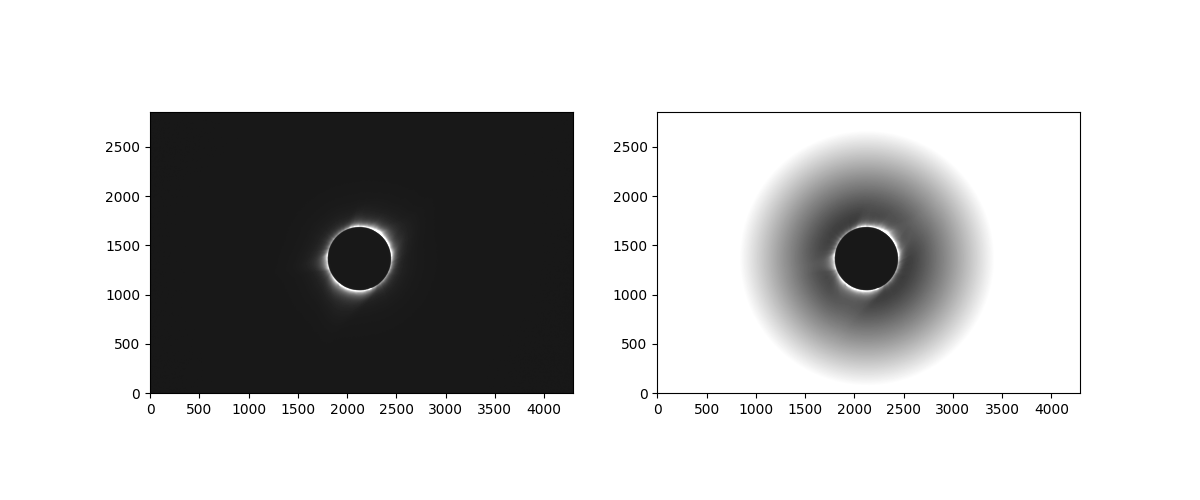

In [62]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axs[0].imshow(mlight, cmap='gray', origin='lower', vmin=50, vmax=200)
axs[1].imshow(mlight2, cmap='gray', origin='lower', vmin=50, vmax=200)

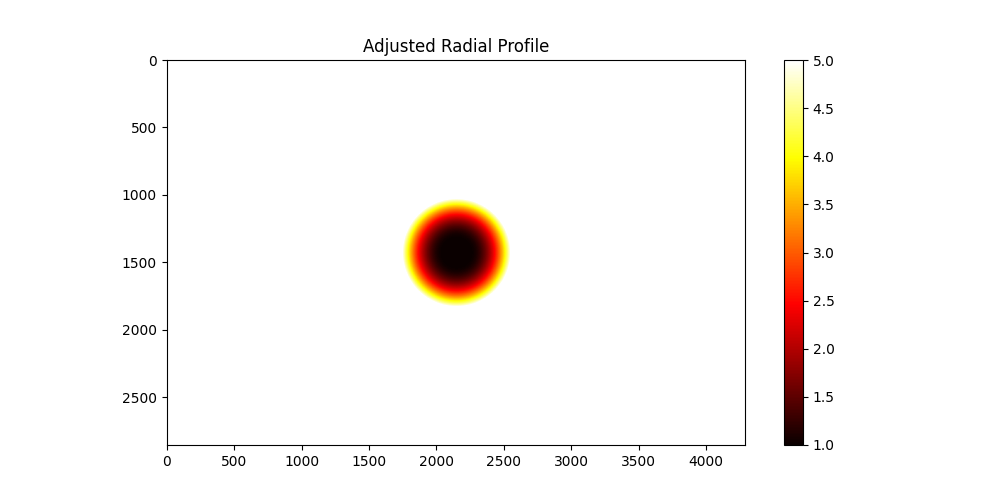

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def create_adjusted_radial_profile(width, height, x0, y0, r0):
    # Create an array of the given dimensions
    y, x = np.ogrid[:height, :width]
    
    # Calculate the distance of each pixel from the center (x0, y0)
    distance_from_center = np.sqrt((x - x0)**2 + (y - y0)**2)
    
    # Initialize the intensity array
    intensity = np.ones((height, width))
    
    # Calculate the constant k based on the condition that intensity equals 5 at 4r0
    k = 4 / (3 * r0)**2
    
    # Apply the radial profile conditions
    R = distance_from_center - r0
    mask = R > 0  # Only apply the formula where R > 0
    intensity[mask] = 1 + k * R[mask]**2
    
    # Clip intensity to not exceed 5 (just in case, depending on the precise interpretation of the bounds)
    intensity = np.clip(intensity, 1, 5)
    
    return intensity

# Define the array dimensions, center coordinates, and r0
width, height = 4290, 2856
x0, y0 = width // 2, height // 2
r0 = 100  # Example radius where intensity starts to increase

# Generate the adjusted radial profile
adjusted_radial_profile = create_adjusted_radial_profile(width, height, x0, y0, r0)

fig = plt.figure(figsize=(10,5))
# Display the radial profile
plt.imshow(adjusted_radial_profile, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Adjusted Radial Profile')
plt.show()